In [1]:
pip install scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# load and investigate the data here:
df = pd.read_csv("tennis_stats.csv")
print(df.head())


# perform exploratory analysis here:
print(df.dtypes)
print("////////////////////")
print(df.info())
print("////////////////////")
print(df.describe(include = 'all'))
print("////////////////////")
print(df.isnull().sum())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

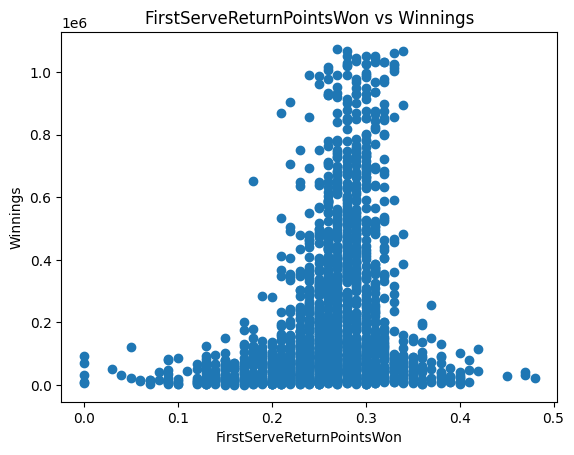

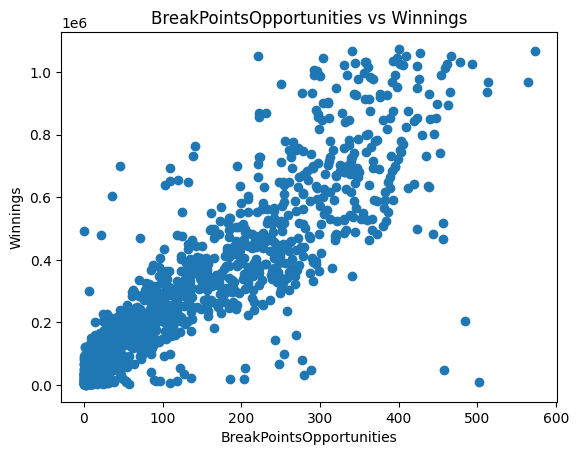

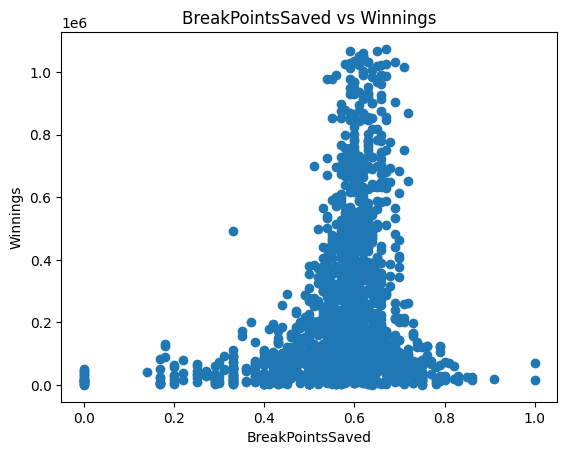

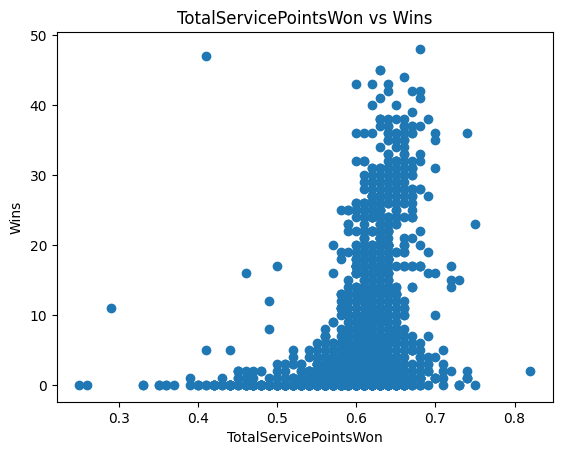

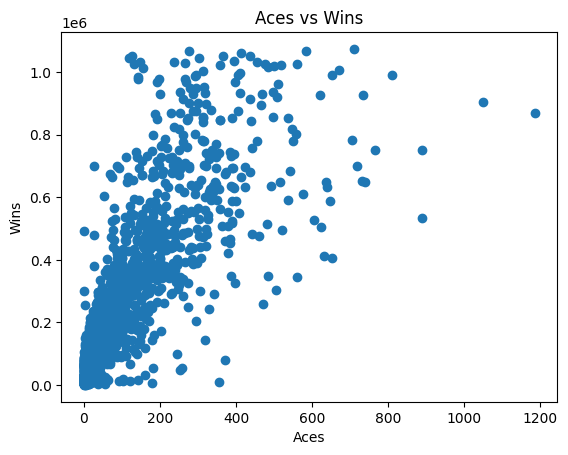

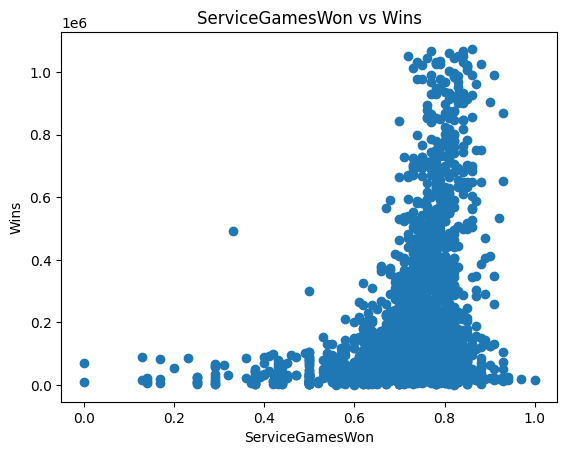

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(df.FirstServeReturnPointsWon, df.Winnings)
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.BreakPointsOpportunities, df.Winnings)
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.BreakPointsSaved, df.Winnings)
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.TotalServicePointsWon,df.Wins)
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()


plt.scatter(df.Aces, df.Winnings)
plt.title('Aces vs Wins')
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.show()
plt.clf()


plt.scatter(df.ServiceGamesWon, df.Winnings)
plt.title('ServiceGamesWon vs Wins')
plt.xlabel('ServiceGamesWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

Predicting Winnings with BreakPointsOpportunities Test Score: 0.8382021165588162


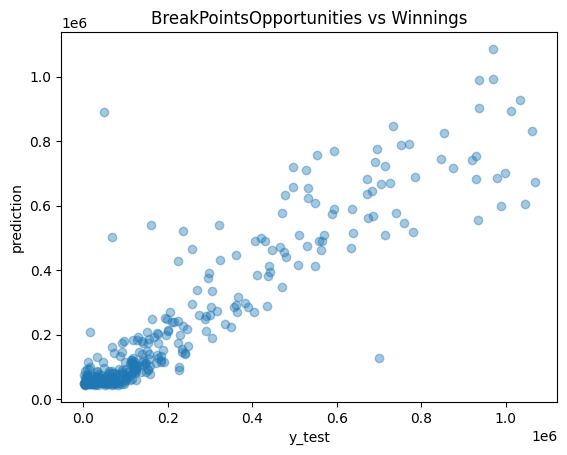

Predicting Winnings with Aces Test Score: 0.5817968178625645


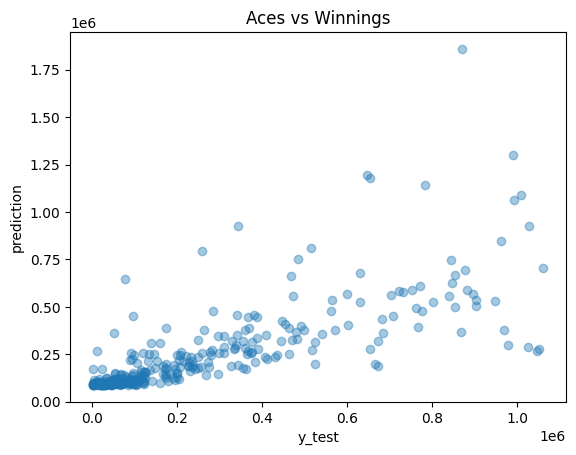

Predicting Winnings with TotalServicePointsWon Test Score: 0.13650243110662352


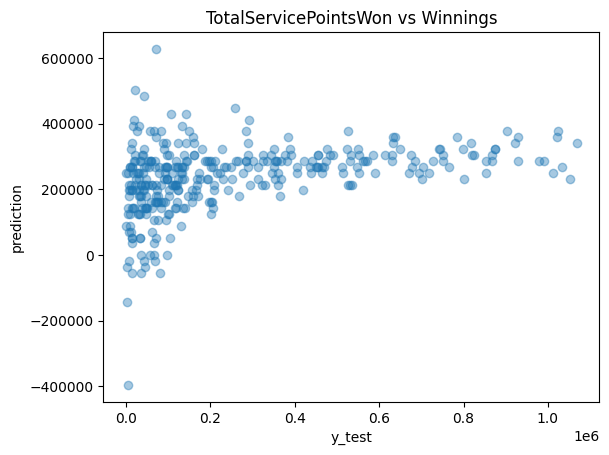

<Figure size 640x480 with 0 Axes>

In [7]:
## perform single feature linear regressions here:
from sklearn.model_selection import train_test_split
model = LinearRegression()


x = df[["BreakPointsOpportunities"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()


x = df[["Aces"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with Aces Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('Aces vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()


x = df[["TotalServicePointsWon"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with TotalServicePointsWon Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('TotalServicePointsWon vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()

Predicting Winnings with BreakPointsOpportunities and FirstServeReturnPointsWon Test Score: 0.8230355745781773


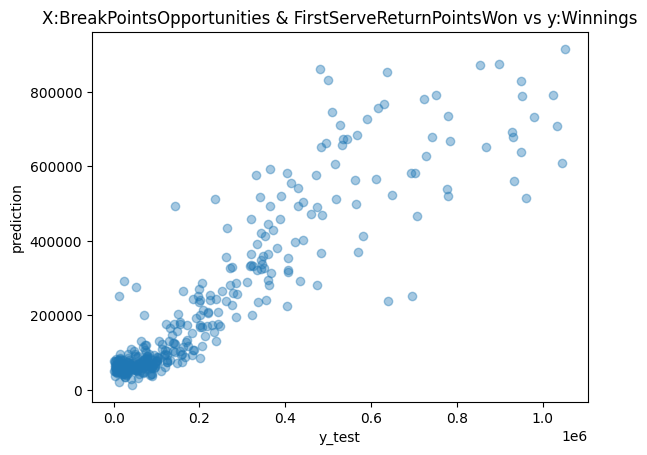

Predicting Winnings with Multiple Features Test Score: 0.8188895759751476


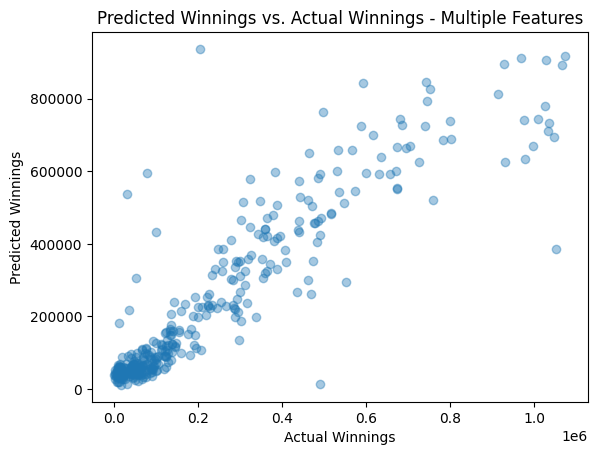

<Figure size 640x480 with 0 Axes>

In [8]:
## perform two feature linear regressions here:
x = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with BreakPointsOpportunities and FirstServeReturnPointsWon Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('X:BreakPointsOpportunities & FirstServeReturnPointsWon vs y:Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()


## perform multiple feature linear regressions here:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]


# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, outcome, train_size = 0.8)
# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)
# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))
# make predictions with model
winnings_prediction = model.predict(features_test)
# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()